In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import json

df = pd.read_json('../data/database-10-12.json')

#### Füge ein neues Feature hinzu: Themengebiet

In [125]:
topics = json.loads(open("topics/topics.json", "r").read())

df['tags_full'] = ['; '.join(tags) for tags in df['tags'].to_list()]

for topic in topics:
    df.loc[(df.title.str.contains('|'.join(topics[topic]['keywords'])) | df.tags_full.str.contains('|'.join(topics[topic]['keywords']))), 'topic'] = topic

#### Ändere die Spalte `ressort` zu einem Anfangsgroßbuchstaben

In [126]:
df.ressort = df.ressort.str.title()

#### Zähle die Artikel pro Themengebiet

In [127]:
df_topic = df.topic.value_counts().reset_index(name="amount")
df_topic['color'] = "#f2cc8f" # ORANGE
df_topic['edgecolor'] = "#e07a5f" # ORANGE
df_topic['type'] = "topic"

#### Zähle die Artikel pro Ressort

In [128]:
df_ressort = df.ressort.value_counts().reset_index(name="amount")
df_ressort['color'] = "#8ecae6" # BLUE
df_ressort['edgecolor'] = "#219ebc" # BLUE
df_ressort['type'] = "ressort"

#### Füge die beiden enstandenen Daten in einen `DataFrame`

In [129]:
df = pd.concat([df_ressort, df_topic])

#### Sortiere die Anzahl der Artikel pro Themengebiet/Ressort (absteigend)

In [130]:
df = df.sort_values("amount", ascending=False)

#### Benenne das Feature `index` zu `group`

In [131]:
df['group'] = df['index']

## Erstelle das Diagramm

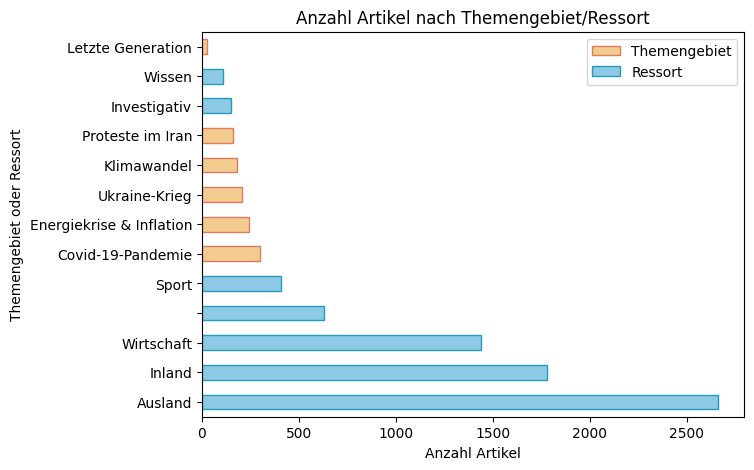

In [132]:
ax = df.plot(kind="barh", x="index", y="amount", figsize=(7,5), xlabel="Anzahl Artikel", ylabel="Themengebiet oder Ressort", legend=False, rot=0, color=df.color, edgecolor=df.edgecolor, title="Anzahl Artikel nach Themengebiet/Ressort")

legend_elements = [Patch(facecolor='#f2cc8f', edgecolor='#e07a5f', label='Themengebiet'), Patch(facecolor='#8ecae6', edgecolor='#219ebc', label='Ressort')]
ax.legend(handles=legend_elements);

ax.get_figure().savefig('figures/bar-topic-ressort.png', bbox_inches="tight")

#### Tausche helle Farben durch dunkle Farben aus

In [133]:
def switch_colors(hex):
    if hex == '#f2cc8f':
        return '#DC921A'
    elif hex == '#e07a5f':
        return '#7A510E'
    elif hex == '#8ecae6':
        return '#257EA7'
    elif hex == '#219ebc':
        return '#156579'

df.color = df.color.apply(switch_colors)
df.edgecolor = df.edgecolor.apply(switch_colors)

#### Mache Abstufungen in den Farbintensitäten, indem Transparenzwerte angehangen werden

In [134]:
# transparent value from 100% - 10% * n; >34%
transparencies = ["FF", "E6", "CC",  "B3",  "99",  "80",  "66", "4D"]
used = {"topic": -1, "ressort": -1}

def highlight_color(row):
    used[row.type] += 1
    row.color += transparencies[used[row.type]]
    return row
    
df = df.apply(highlight_color, axis=1)

#### Füge ein neues Feature hinz: `padding` als `explode` Wert für Tortendiagramm 

In [147]:
df.loc[(df.amount < 500), 'padding'] = 0.3

df['padding'] = df['padding'].fillna(0)

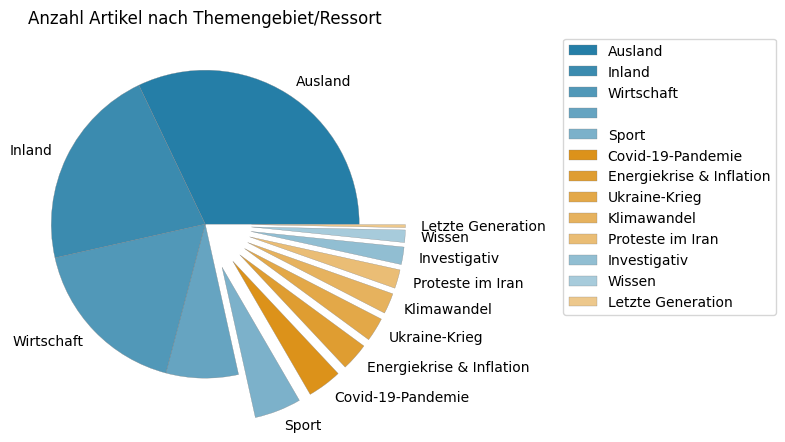

In [149]:
ax = df.plot(kind="pie", x="group", y="amount", figsize=(7,5), labels=df.group, explode=df.padding, fontsize=10, colors=df.color, legend=True, title="Anzahl Artikel nach Themengebiet/Ressort", wedgeprops={"edgecolor": "grey", 'linewidth': 0.2, 'linestyle': 'solid', 'antialiased': True})

ax.axes.get_yaxis().get_label().set_visible(False)

ax.legend(labels=df.group, bbox_to_anchor=(2.0, 1.0))

ax.get_figure().savefig('figures/pie-topic-ressort.png', bbox_inches="tight")